# Time Series Visualiser

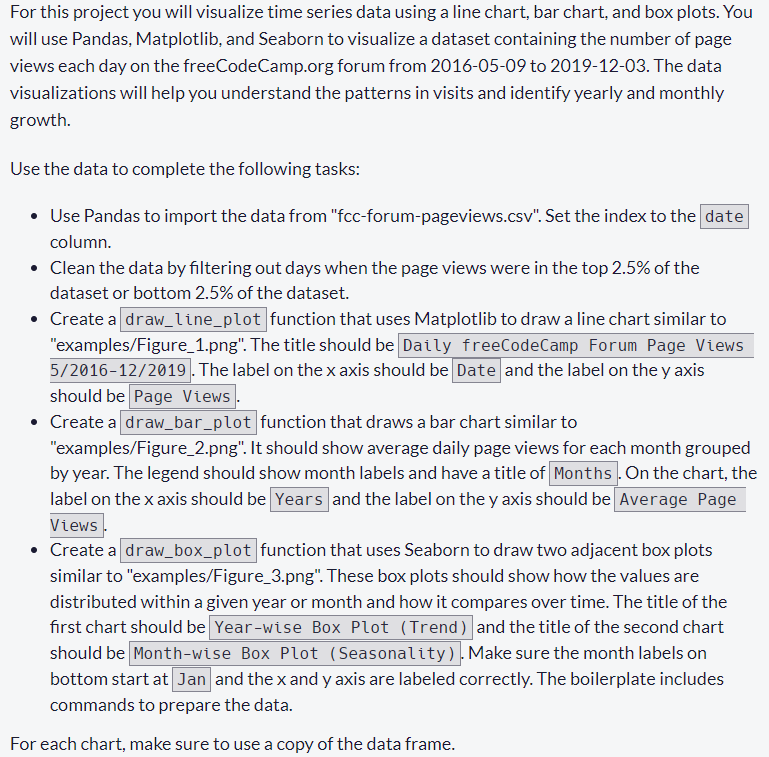

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


## Task 1
Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [75]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates= True, index_col= "date")

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [36]:
df.index

DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1304, freq=None)

## Task 2 
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

First find the values of the percentiles

In [76]:
upper = np.percentile(df["value"], 97.5)
lower = np.percentile(df["value"], 2.5)

upper, lower

(177613.075, 17876.4)

In [77]:
df = df[(df["value"]>lower) & (df["value"] < upper)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## Task 3 
Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

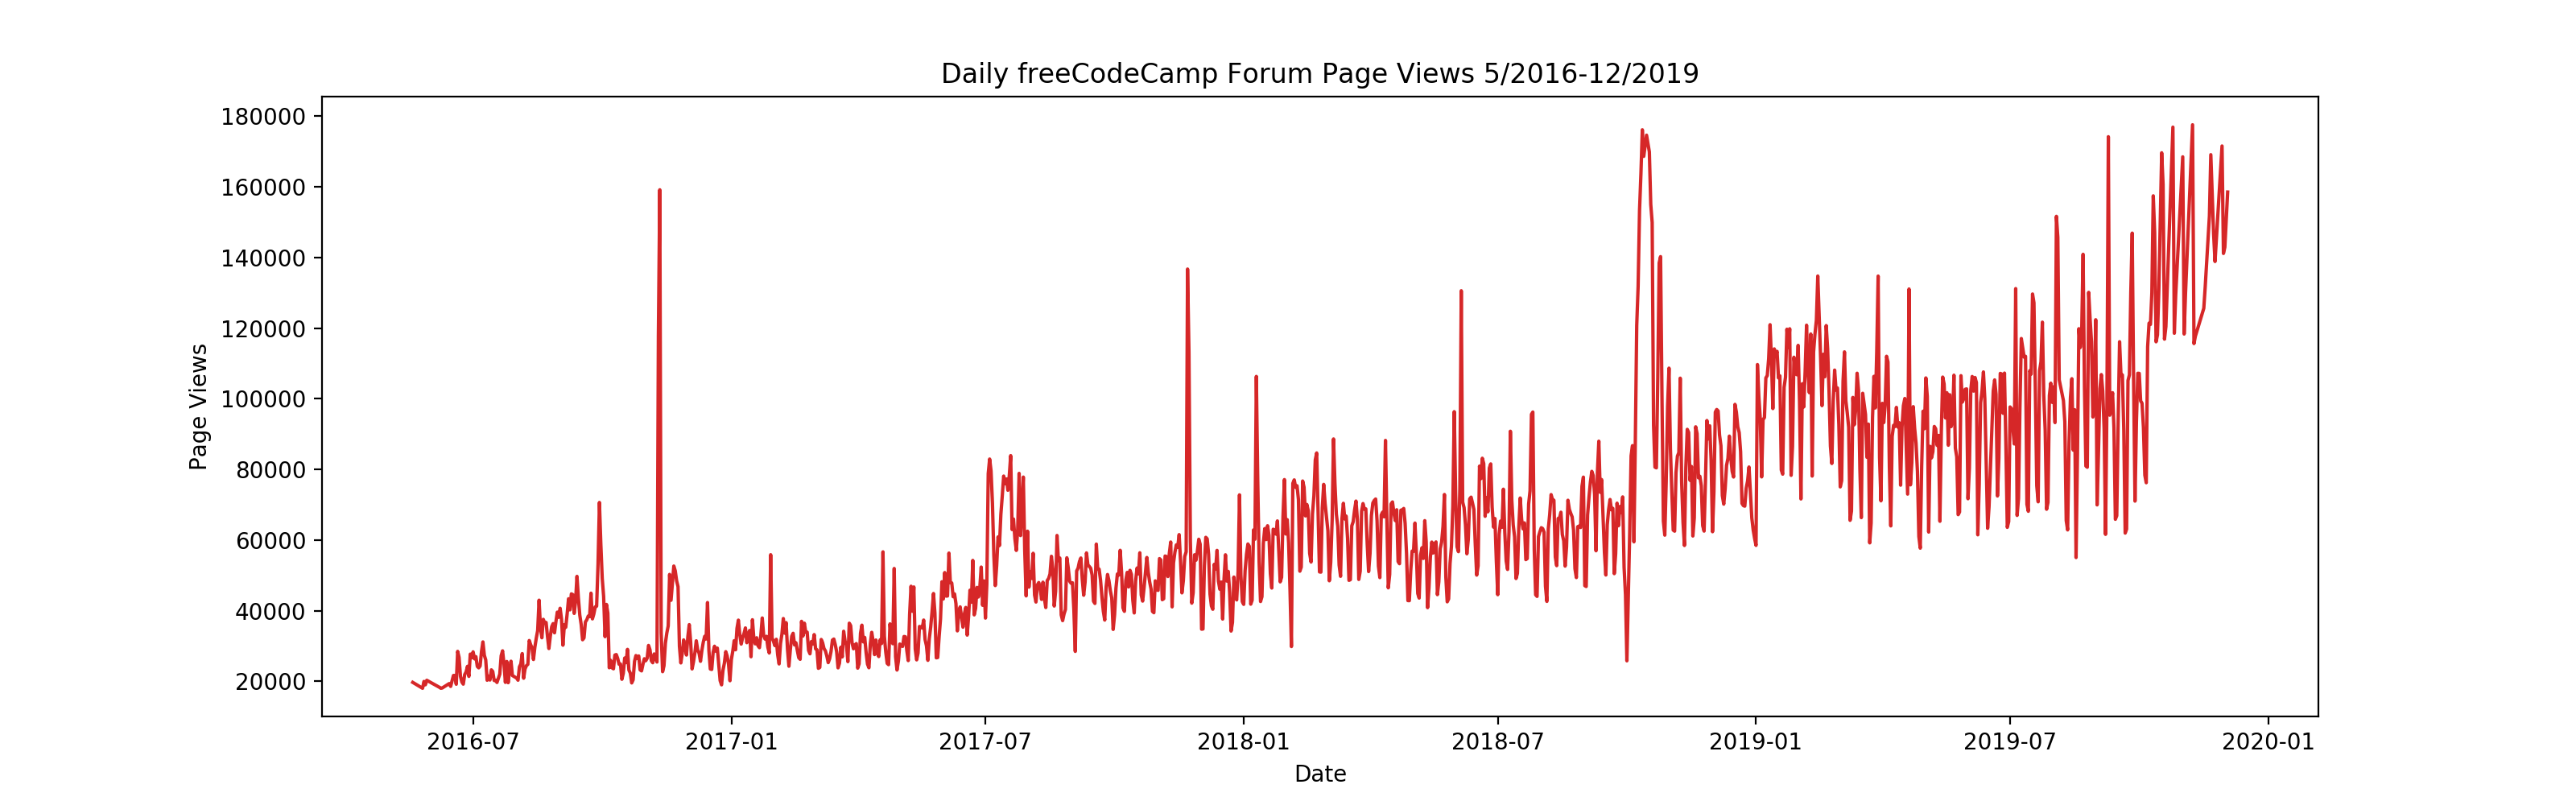


<module 'matplotlib.pyplot' from 'C:\\Users\\25125028\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

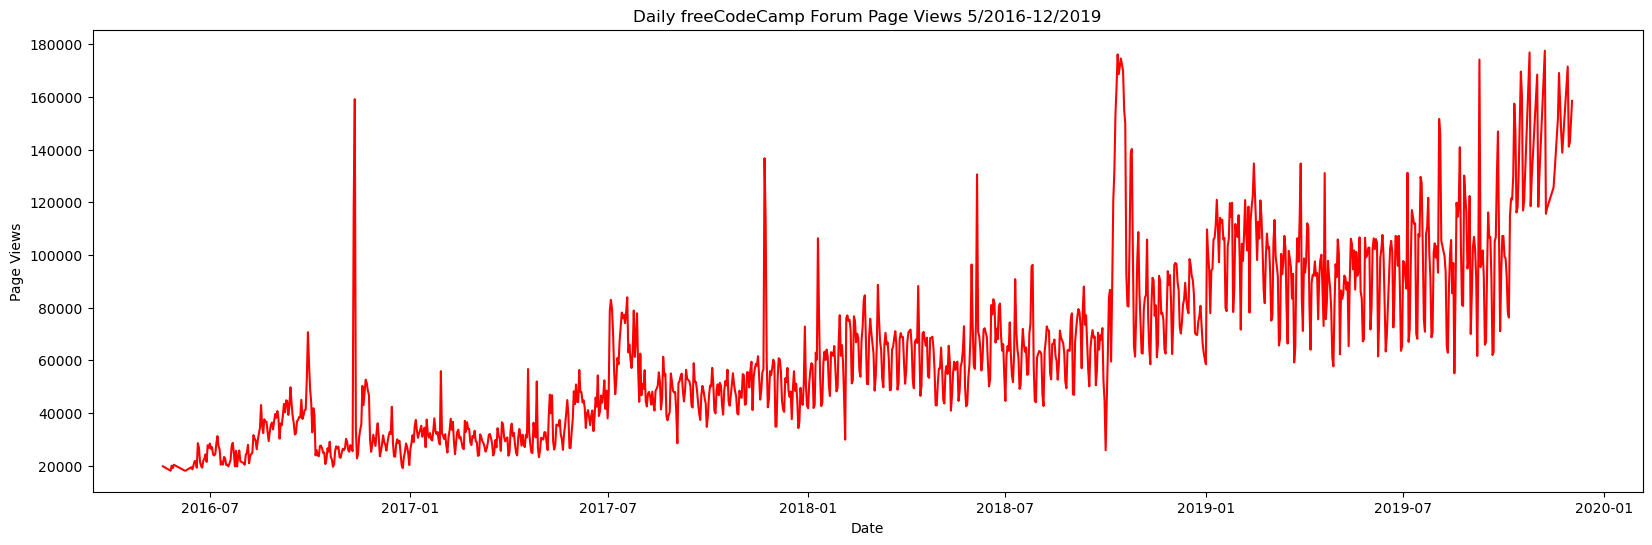

In [151]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, "value", data = df, color = "red") 
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

fig = plt
fig

## Task 4
Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

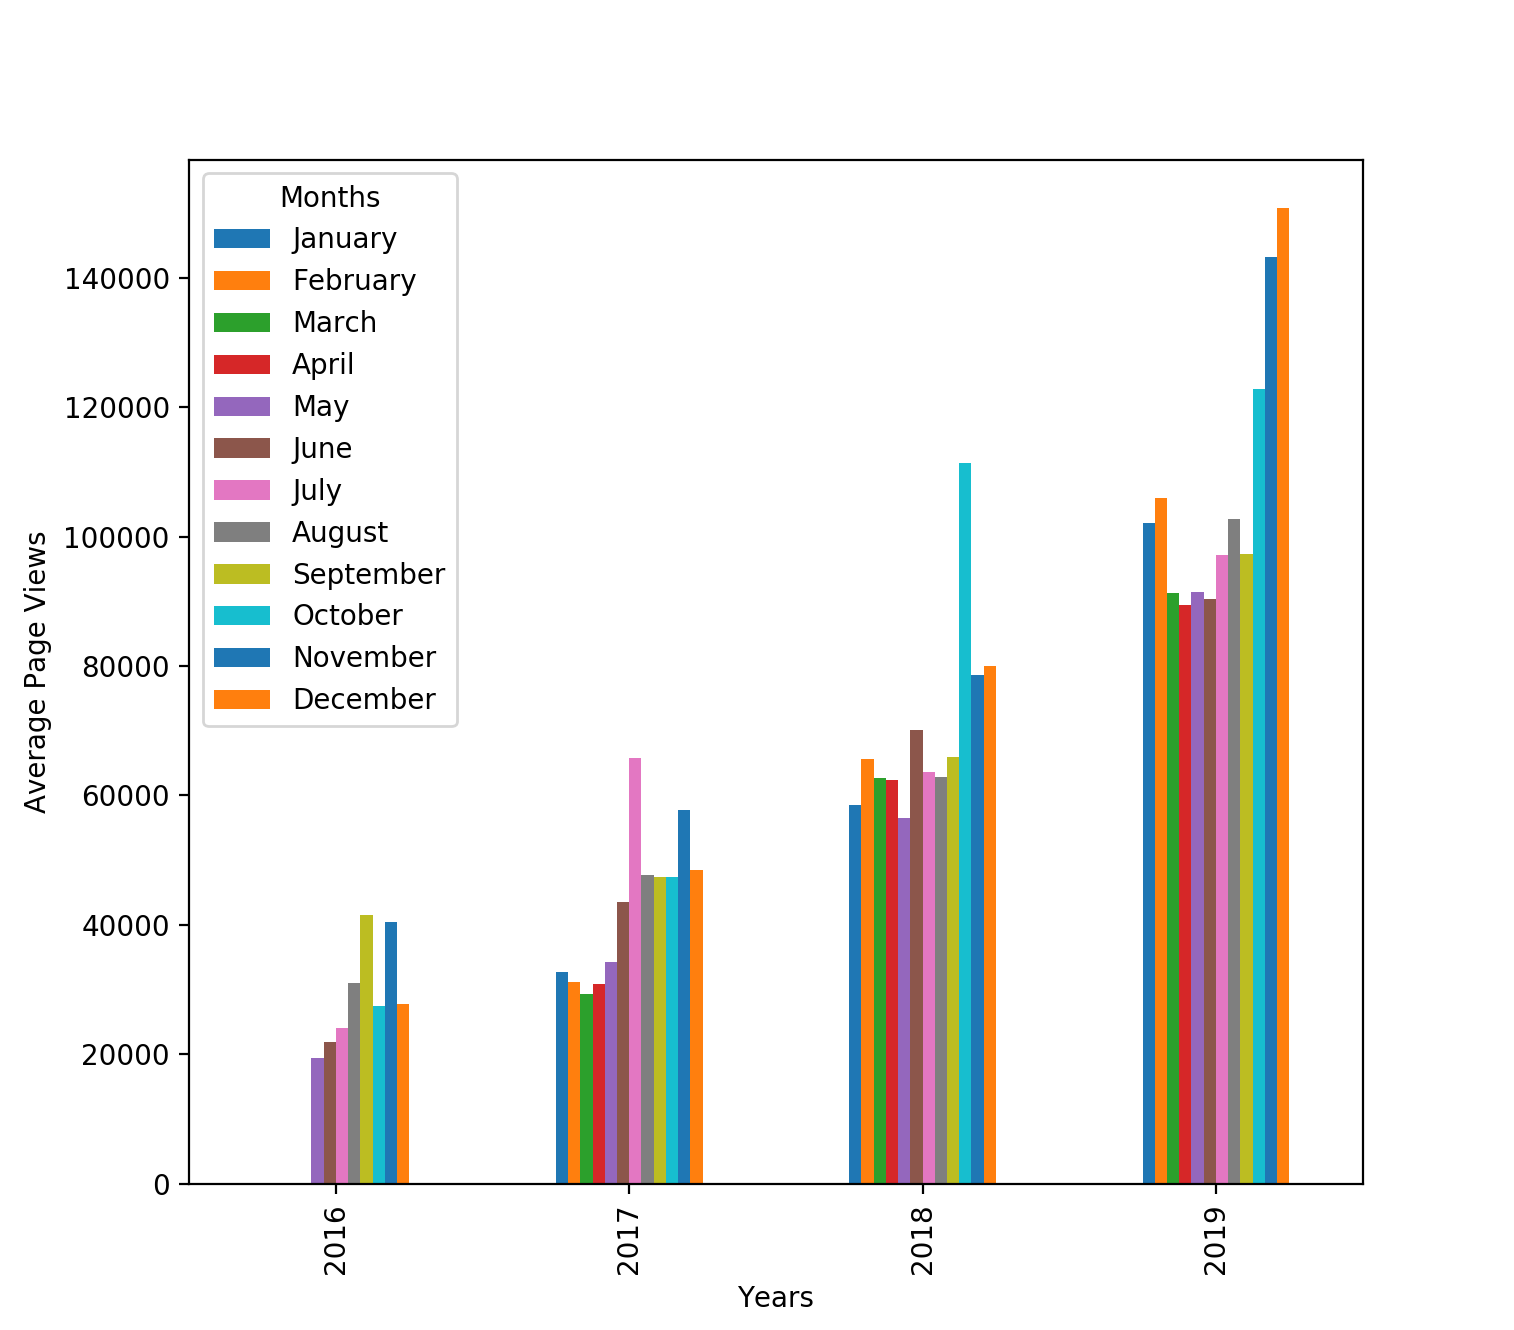


In [81]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


First I'm making columns for the year and month

In [79]:
dfyear = df.copy()

In [82]:
dfyear['Year'] = dfyear.index.year
dfyear['Month'] = dfyear.index.strftime('%B')

dfyear

,value,Year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


Group the dfyear dataframe by both year and month and get the average value per month. 

In [90]:
dfyear.groupby(["Year", "Month"]).mean()


value
Year Month                   
2016 August      31049.193548
     December    27832.419355
     July        24109.678571
     June        21875.105263
     May         19432.400000
     November    40448.633333
     October     27398.322581
     September   41476.866667
2017 April       30878.733333
     August      47712.451613
     December    48420.580645
     February    31113.071429
     January     32785.161290
     July        65806.838710
     June        43577.500000
     March       29369.096774
     May         34244.290323
     November    57701.566667
     October     47438.709677
     September   47376.800000
2018 April       62350.833333
     August      62831.612903
     December    80047.483871
     February    65679.000000
     January     58580.096774
     July        63591.064516
     June        70117.000000
     March       62693.774194
     May         56562.870968
     November    78688.333333
     October    111378.142857
     September   65941.733333
2019 April       89368.433333
     August     102717.310345
     December   150733.500000
     February   105968.357143
     January    102056.516129
     July        97236.566667
     June        90435.642857
     March       91214.483871
     May         91439.903226
     November   143166.428571
     October    122802.272727
     September   97268.833333

Make the bar plot

In [94]:
dfyear_reset = dfyear.reset_index()

pivot_dfyear = dfyear_reset.pivot_table(index='Year', columns='Month', values='value', aggfunc='mean')

pivot_dfyear

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


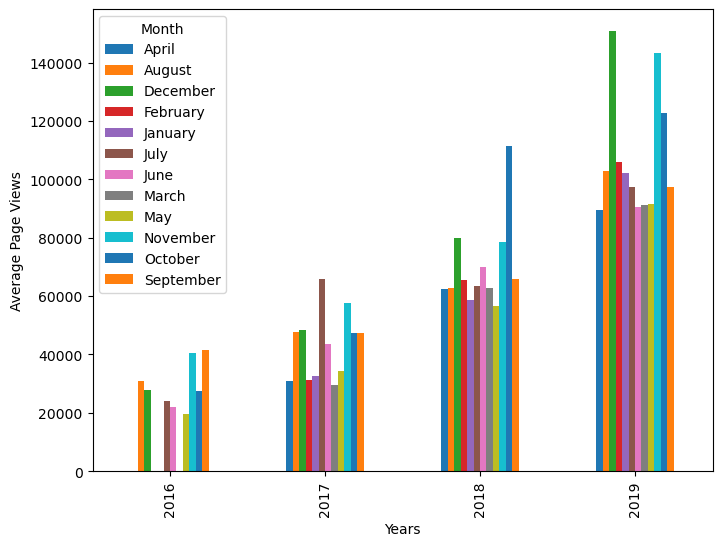

In [95]:
pivot_dfyear.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
# plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

## Task 5
Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

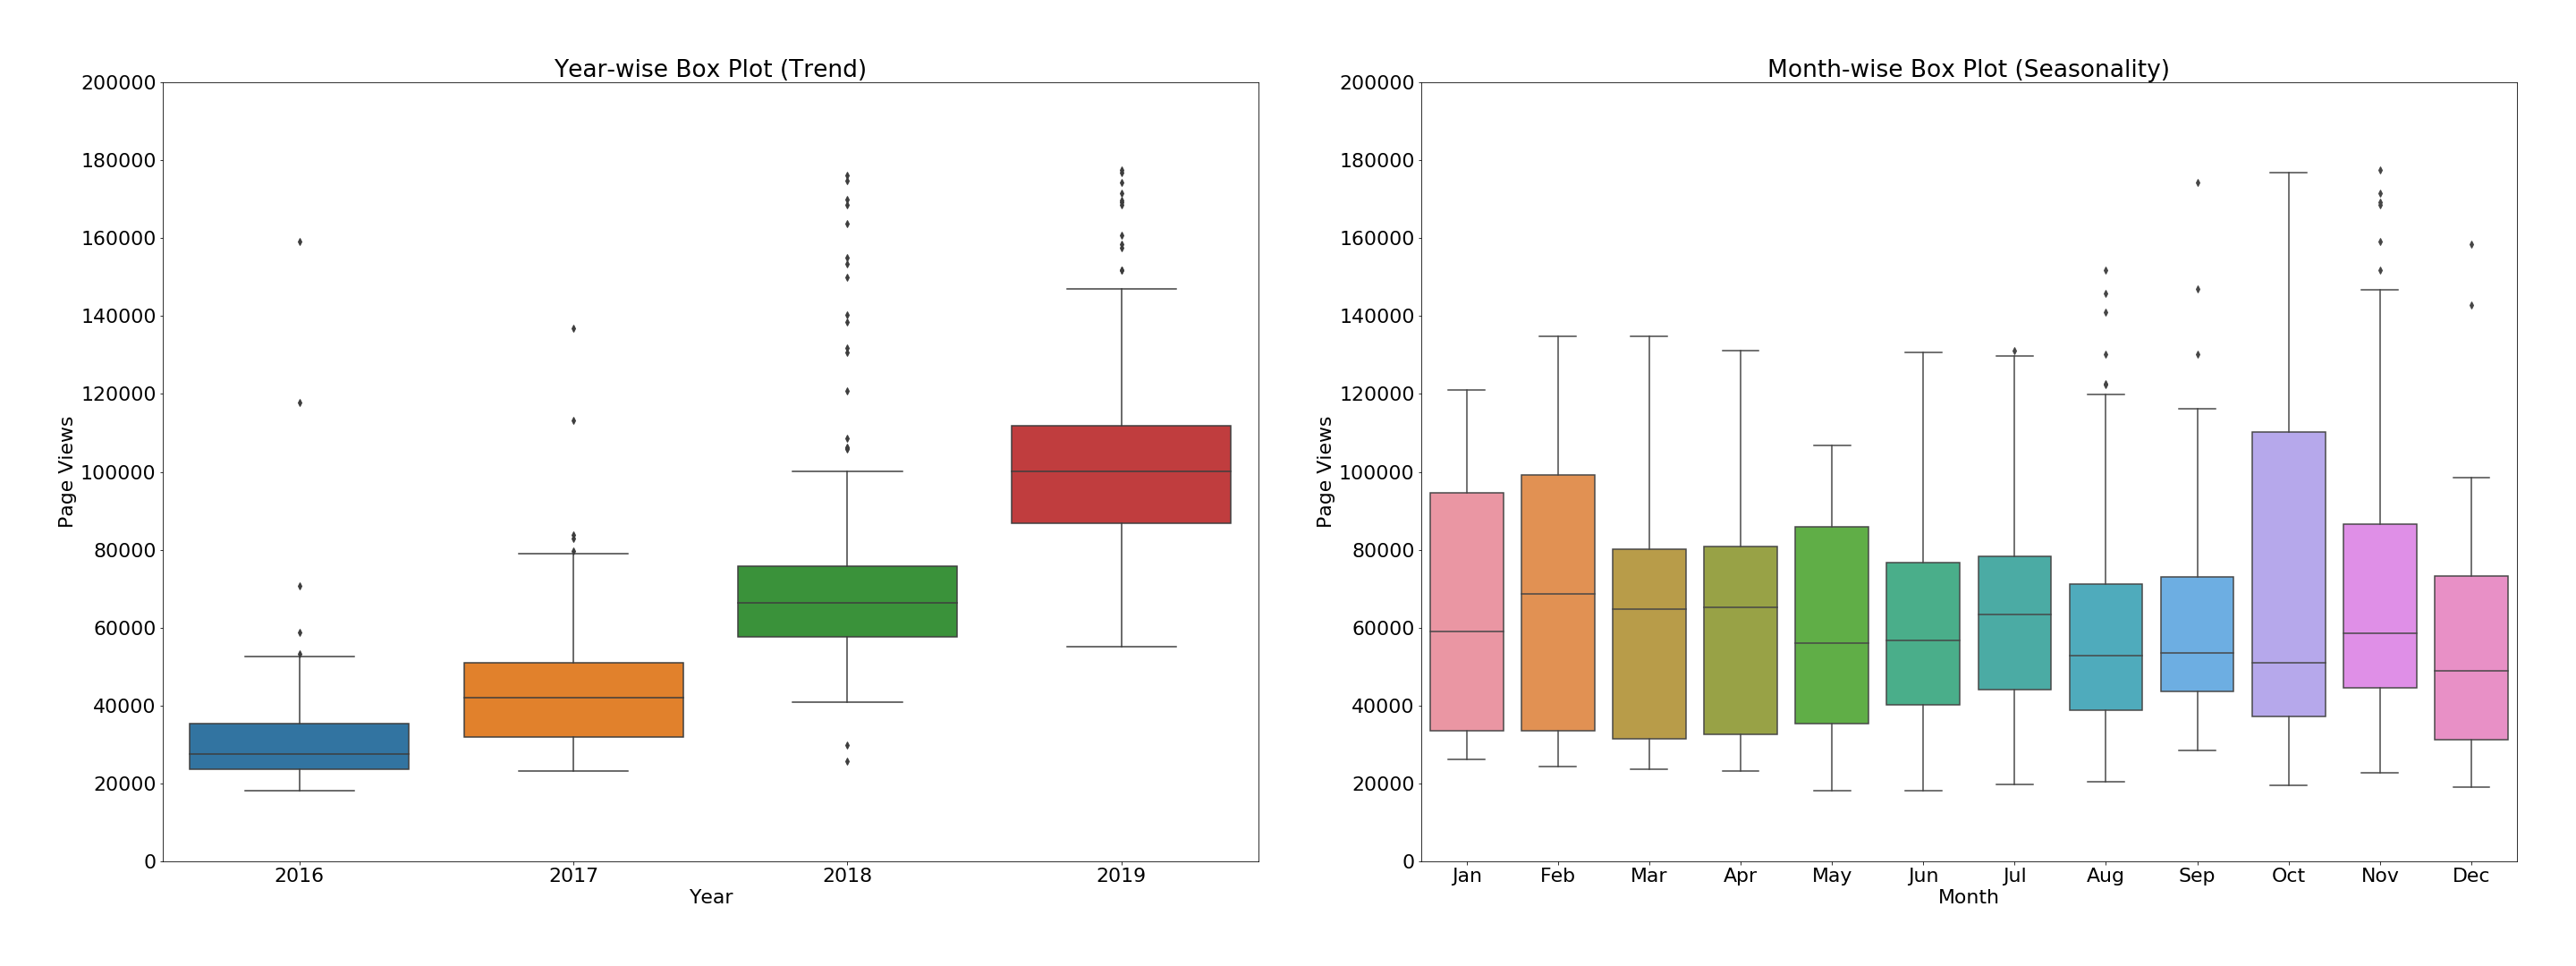

In [98]:
# Prepare data for box plots (this part is done!)

# Make a copy of df
df_box = df.copy()

# Make the date index into a column instead
df_box.reset_index(inplace=True)

# Make the year and month columns
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [99]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Now to draw box plots using seaborn

<Axes: title={'center': 'Year-wise Box Plot (Trend)'}, xlabel='Year', ylabel='Page Views'>

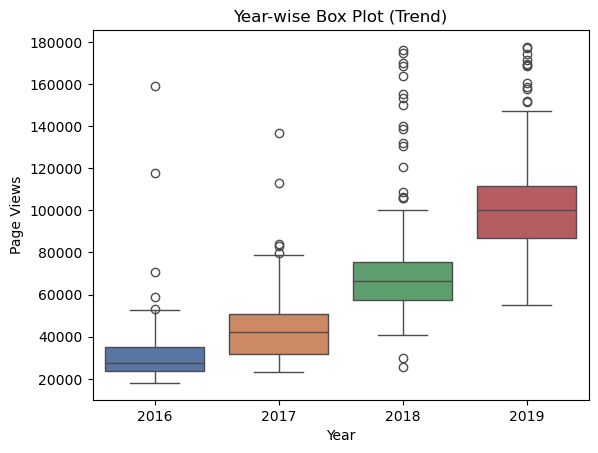

In [124]:
# Make the left plot
trend = sns.boxplot(x = "year", y = "value", hue = "year", palette = "deep", data = df_box)

trend.set_xlabel("Year")
trend.set_ylabel("Page Views")
trend.set_title("Year-wise Box Plot (Trend)")
trend.legend().remove()


trend 

<Axes: title={'center': 'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>

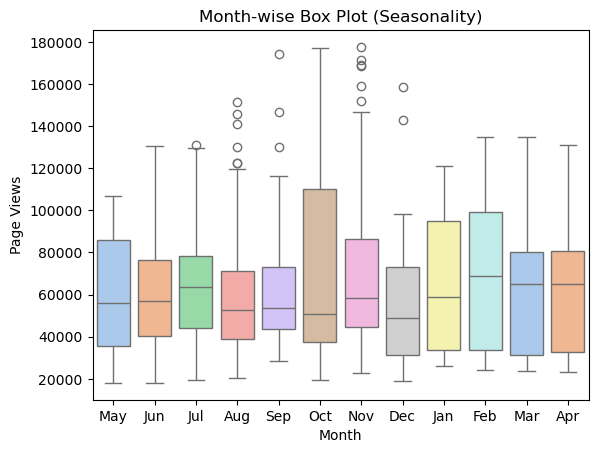

In [127]:
# Make the right plot
seas = sns.boxplot(x = "month", y = "value", hue = "month", palette = "pastel", data = df_box)

seas.set_xlabel("Month")
seas.set_ylabel("Page Views")
seas.set_title("Month-wise Box Plot (Seasonality)")


seas 

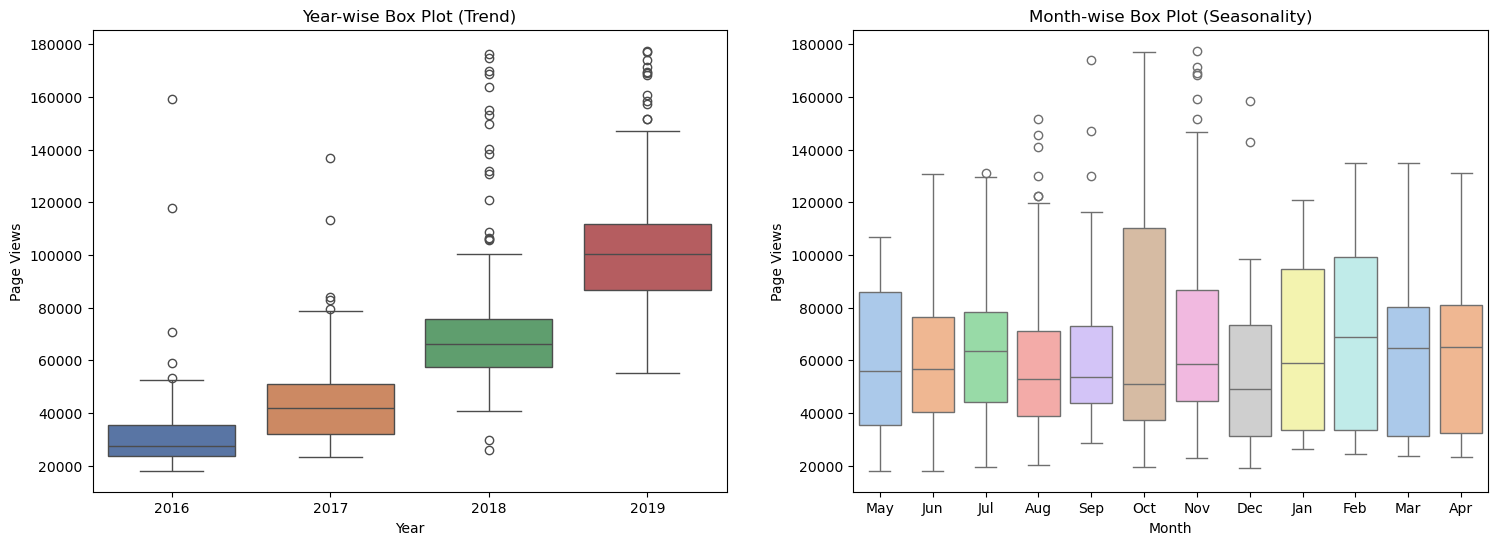

In [141]:
# Create a figure with two subplots (side by side)
fig, (trend, seas) = plt.subplots(1, 2, figsize = (18, 6))

# Plot on the first axis (trend)
sns.boxplot(x="year", y="value", hue="year", palette="deep", data=df_box, ax=trend)
trend.set_xlabel("Year")
trend.set_ylabel("Page Views")
trend.set_title("Year-wise Box Plot (Trend)")
trend.legend().remove()

# Plot on the second axis (seasonality)
sns.boxplot(x="month", y="value", hue="month", palette="pastel", data=df_box, ax=seas)
seas.set_xlabel("Month")
seas.set_ylabel("Page Views")
seas.set_title("Month-wise Box Plot (Seasonality)")

plt.show() 

# End result

In [142]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates= True, index_col= "date")

# Clean data

upper = np.percentile(df["value"], 97.5)
lower = np.percentile(df["value"], 2.5)

df = df[(df["value"]>lower) & (df["value"] < upper)]


def draw_line_plot():
    # Draw line plot
    plt.figure(figsize=(20, 6))
    plt.plot(df.index, "value", data = df, color = "red") 
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    fig = plt

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    
    df_bar['Year'] = df_bar.index.year
    df_bar['Month'] = df_bar.index.strftime('%B')

    df_bar.groupby(["Year", "Month"]).mean()

    df_bar_reset = df_bar.reset_index()
    pivot_df_bar = df_bar_reset.pivot_table(index='Year', columns='Month', values='value', aggfunc='mean')

    # Draw bar plot

    pivot_dfyear.plot(kind='bar', figsize=(8, 6))
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    
    fig = plt
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    # Create a figure with two subplots (side by side)
    fig, (trend, seas) = plt.subplots(1, 2, figsize = (18, 6))

    # Plot on the first axis (trend)
    sns.boxplot(x="year", y="value", hue="year", palette="deep", data=df_box, ax=trend)
    trend.set_xlabel("Year")
    trend.set_ylabel("Page Views")
    trend.set_title("Year-wise Box Plot (Trend)")
    trend.legend().remove()

    # Plot on the second axis (seasonality)
    sns.boxplot(x="month", y="value", hue="month", palette="pastel", data=df_box, ax=seas)
    seas.set_xlabel("Month")
    seas.set_ylabel("Page Views")
    seas.set_title("Month-wise Box Plot (Seasonality)")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
